# Examples

This Jupyter notebook shows some examples for the different functions of the Matlab class `zaf`.

Functions:
- [`stft`](#stft) - Compute the short-time Fourier transform (STFT).
- [`istft`](#istft) - Compute the inverse STFT.
- [`cqtkernel`](#cqtkernel) - Compute the constant-Q transform (CQT) kernel.
- [`cqtspectrogram`](#cqtspectrogram) - Compute the CQT spectrogram using a CQT kernel.
- [`cqtchromagram`](#cqtchromagram) - Compute the CQT chromagram using a CQT kernel.
- [`mfcc`](#mfcc) - Compute the mel frequency cepstrum coefficients (MFCCs).
- [`dct`](#dct) - Compute the discrete cosine transform (DCT) using the fast Fourier transform (FFT).
- [`dst`](#dst) - Compute the discrete sine transform (DST) using the FFT.
- [`mdct`](#mdct) - Compute the modified discrete cosine transform (MDCT) using the FFT.
- [`imdct`](#imdct) - Compute the inverse MDCT using the FFT.

Other:
- `sigplot` - Plot a signal in seconds.
- `specshow` - Display a spectrogram in dB, seconds, and Hz.
- `cqtspecshow` - Display a CQT spectrogram in dB, seconds, and Hz.
- `cqtchromshow` - Display a CQT chromagram in seconds.


Author:
- Zafar Rafii
- zafarrafii@gmail.com
- http://zafarrafii.com
- https://github.com/zafarrafii
- https://www.linkedin.com/in/zafarrafii/
- 12/03/20

## <a id="stft"></a>stft

Compute the short-time Fourier transform (STFT).

```
audio_stft = zaf.stft(audio_signal, window_function, step_length)

Inputs:
    audio_signal: audio signal (number_samples,)
    window_function: window function (window_length,)
    step_length: step length in samples
Output:
    audio_stft: audio STFT (window_length, number_frames)
```

### Example: Compute and display the spectrogram from an audio file.

                        ALim: [0 1]
                    ALimMode: 'auto'
                  AlphaScale: 'linear'
                    Alphamap: [1x64 double]
           AmbientLightColor: [1 1 1]
                BeingDeleted: off
                         Box: on
                    BoxStyle: 'back'
                  BusyAction: 'queue'
               ButtonDownFcn: ''
                        CLim: [-101.6079 43.5410]
                    CLimMode: 'auto'
              CameraPosition: [496.5000 512.5000 17.3205]
          CameraPositionMode: 'auto'
                CameraTarget: [496.5000 512.5000 0]
            CameraTargetMode: 'auto'
              CameraUpVector: [0 -1 0]
          CameraUpVectorMode: 'auto'
             CameraViewAngle: 6.6086
         CameraViewAngleMode: 'auto'
                    Children: [1x1 Image]
                    Clipping: on
               ClippingStyle: '3dbox'
                       Color: [1 1 1]
                  ColorOrder: [7x3 double]
             Col

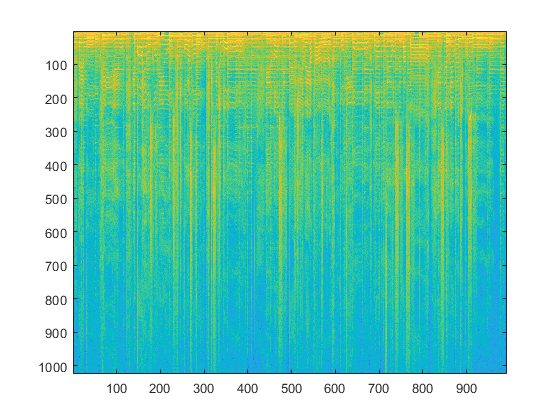

In [46]:
% Read the audio signal with its sampling frequency in Hz, and average it over its channels
[audio_signal,sampling_frequency] = audioread('audio_file.wav');
audio_signal = mean(audio_signal,2);

% Set the window duration in seconds (audio is stationary around 40 milliseconds)
window_duration = 0.04;

% Derive the window length in samples (use powers of 2 for faster FFT and constant overlap-add (COLA))
window_length = 2^nextpow2(window_duration*sampling_frequency);

% Compute the window function (periodic Hamming window for COLA)
window_function = hamming(window_length,'periodic');

% Set the step length in samples (half of the window length for COLA)
step_length = window_length/2;

% Compute the STFT
audio_stft = zaf.stft(audio_signal,window_function,step_length);

% Derive the magnitude spectrogram (without the DC component and the mirrored frequencies)
audio_spectrogram = abs(audio_stft(2:window_length/2+1,:));

% Display the spectrogram in dB, seconds, and Hz
% xtick_step = 1;
% ytick_step = 1000;
% figure
% im = zaf.specshow(audio_spectrogram, length(audio_signal), sampling_frequency, xtick_step, ytick_step)
% set(im.Parent, 'Position') = [0.1300 0.1100 0.7750 0.8150]
% title('Spectrogram (dB)')
% % set(gcf, 'Position',  [100, 100, 500, 400])

im = imagesc(db(audio_spectrogram));
get(im.Parent)
% set(im.Parent, 'CameraPosition', [0 0 1 2])